# Работа с категориальными признаками



In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
import seaborn as sns
from sklearn import tree

In [23]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stepik126333/students.csv', delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          186 non-null    int64  
 1   Growth                       186 non-null    int64  
 2   Shoe size                    186 non-null    int64  
 3   Course number                186 non-null    int64  
 4   Year of birth                186 non-null    int64  
 5   Friend number                186 non-null    int64  
 6   Russian rating               186 non-null    int64  
 7   Maths rating                 186 non-null    int64  
 8   Physics rating               186 non-null    int64  
 9   Computer science rating      186 non-null    int64  
 10  Chemistry rating             186 non-null    int64  
 11  Literature rating            186 non-null    int64  
 12  History rating               186 non-null    int64  
 13  Geography rating    

In [24]:
from sklearn import preprocessing
coder = preprocessing.LabelEncoder()
coder.fit(df['Sex'])
coder.transform(df['Sex'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [25]:
#print(df['Sex'])
df['Sex'].astype('category').cat.codes

0      0
1      1
2      1
3      0
4      0
      ..
181    0
182    0
183    0
184    0
185    0
Length: 186, dtype: int8

In [26]:
df['Sex']=coder.transform(df['Sex'])

In [15]:
# coder.fit(df['Coin'])
# coder.transform(df['Coin'])
# df['Coin']=coder.transform(df['Coin'])

# coder.fit(df['Animal'])
# coder.transform(df['Animal'])
# df['Animal']=coder.transform(df['Animal'])

# coder.fit(df['Army'])
# coder.transform(df['Army'])
# df['Army']=coder.transform(df['Army'])

# coder.fit(df[name])
# coder.transform(df[name])
# df[name]=coder.transform(df[name])

In [27]:
for name in ['Coin','Animal','Army']:
  coder.fit(df[name])
  df[name]=coder.transform(df[name])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          186 non-null    int64  
 1   Growth                       186 non-null    int64  
 2   Shoe size                    186 non-null    int64  
 3   Course number                186 non-null    int64  
 4   Year of birth                186 non-null    int64  
 5   Friend number                186 non-null    int64  
 6   Russian rating               186 non-null    int64  
 7   Maths rating                 186 non-null    int64  
 8   Physics rating               186 non-null    int64  
 9   Computer science rating      186 non-null    int64  
 10  Chemistry rating             186 non-null    int64  
 11  Literature rating            186 non-null    int64  
 12  History rating               186 non-null    int64  
 13  Geography rating    

In [29]:
df_cut=df[['Growth','Weight','Sex','Hair length','Children number','Coin','Animal','Army']]
df_cut=df_cut.dropna()

In [30]:
model=tree.DecisionTreeClassifier(max_depth=4)
model.fit(df_cut[['Growth','Weight','Hair length','Children number','Coin','Animal','Army']].values.reshape(-1,7), y=df_cut['Sex'].values)

DecisionTreeClassifier(max_depth=4)

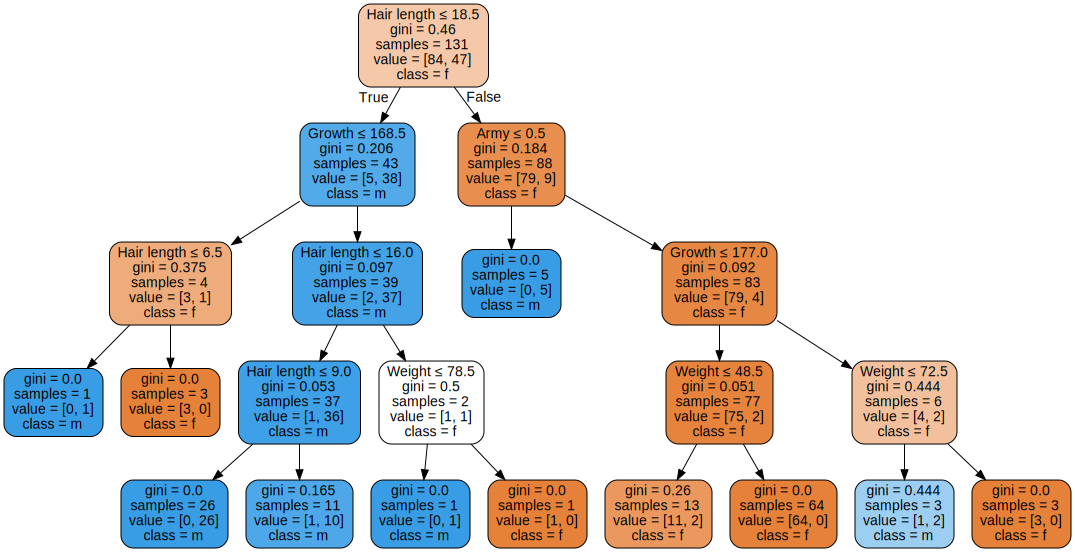

In [31]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=['Growth','Weight','Hair length','Children number','Coin','Animal','Army'],  
                      class_names=['f', 'm'],  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Загружаем тестовую выбоку

In [32]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stepik126333/students_test.csv', delimiter=',')
df_test_cut=df_test[['Growth','Weight','Sex','Hair length','Children number','Coin','Animal','Army']]
df_test_cut=df_test_cut.dropna()

In [33]:
for name in ['Sex','Coin','Animal','Army']:
  coder.fit(df_test_cut[name])
  coder.fit(df_test_cut[name])
  df_test_cut[name]=coder.transform(df_test_cut[name])

Внимание: через функцию predict прогоняем объекты **тестовой** выборки

In [34]:
df_test_cut['Predicted']=model.predict(df_test_cut[['Growth','Weight','Hair length','Children number','Coin','Animal','Army']].values.reshape(-1,7))

Метрики качества задачи классификации

In [35]:
pd.crosstab(df_test_cut['Predicted'],df_test_cut['Sex'])

Sex,0,1
Predicted,,
0,40,0
1,2,26


Так считаются метрики качества в задаче классификации

Есть два показателя: precision и recall. Их можно подсчитать для каждого класса.

**recall(для женщин)=доля правильно предсказанных женщин среди среди всех женщин**

В нашем примере: recall(для женщин)=40/(40+2)=0.9523809523809523

**recall(для мужчин)=доля правильно предсказанных мужчин среди среди всех мужчин**

В нашем примере: recall(для мужчин)=25/(25+1)=0.9615384615384616

**precision(для женщин)=доля истинных женщин среди людей, отнесенных ИИ к женщинам**

В нашем примере: precision(для женщин)=40/(40+1)=0.975609756097561

**precision(для мужчин)=доля истинных мужчин среди людей, отнесенных ИИ к мужчинам**

В нашем примере: precision(для мужчин)=25/(25+2)=0.9259259259259259



In [36]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(df_test_cut['Sex'], df_test_cut['Predicted'])

(array([1.        , 0.92857143]),
 array([0.95238095, 1.        ]),
 array([0.97560976, 0.96296296]),
 array([42, 26]))